**Machine Learning**

**Assignment 02**
**part d**

Sean Fletcher



# <center> A Study of Factors related to Diabetic risk in Adults </center>

**<center> part d**

## Introduction


This notebook is a product of a Machine Learning class taught at the University of Southern Maine. The objective of this notebook is to demonstrate some proficiency in building predictive models. The section descriptions in this notebook's introduction include references for the websites and notebooks I used while creating it. The sections of this notebook are:


1. **Introduction**: This section. In addition to a general overview of this notebook, this section also includes a list of references and the import calls for all packages and libraries used in this notebook.
2. **Problem Definition**:  A simple description of what diabetes is and why diabetes is a serious health concern. (reference 1-5)
3. **Data Gathering**: All the data used in this notebook was gathered from the Centers for Disease Control and Prevention's National Health and Nutrition Examination Survey (references 6). Professor Bruce MacLeod's template for Lab 04 was used as an outline (reference 7).
4. **Data Cleaning and Wrangling**: In this section I prepare the data for further processing. I rename columns so while working with the data I can easily remember what each column is for. I remove data that will not be useful to the task (i.e. rows where ago < 20; this task is predicting diabetes risk in adults). I clean/restructure the data by recoding a few categorical columns. I remove rows with multiple null values, and also impute values into a few select columns. Lastly I combine two columns into a single columns "diabetes" that I will use as this notebook's target column. I references Professor MacLeod's extensively for this section (reference 7).


5. **Exploratory Data Analysis**: While conducting exploratory data analysis I found and fixed some issues in my labeling. I also found patterns between various attributes which led me to drop a column that I believe is redundant.(references 7, 8, 9, 10, 11)


6. **Data Modelling**: In this notebook I only look at 1 model, the Stochastic Gradient Descent Classifier. In the following notebooks I will be adding and comparing other models to each other.


7. **Prediction**: I use the Stochastic Gradient Descent Classifier to make predictions on the test data. It does not do a very good job.







**References:**

1. https://www.mayoclinic.org/diseases-conditions/diabetes/symptoms-causes/syc-20371444

2. https://en.wikipedia.org/wiki/Type_2_diabetes

3. https://en.wikipedia.org/wiki/Diabetes

4. Rahman MS, Hossain KS, Das S, Kundu S, Adegoke EO, Rahman MA, Hannan MA, Uddin MJ, Pang MG. Role of Insulin in Health and Disease: An Update. Int J Mol Sci. 2021 Jun 15;22(12):6403. doi: 10.3390/ijms22126403. PMID: 34203830; PMCID: PMC8232639

5. https://www.cdc.gov/diabetes/basics/diabetes.html#:~:text=Diabetes%20is%20a%20chronic%20(long,your%20pancreas%20to%20release%20insulin.


6. https://wwwn.cdc.gov/nchs/nhanes/default.aspx\

7. https://github.com/bruceMacLeod/COS475-575/blob/main/Lab/CVDPrediction.ipynb

8. https://github.com/bruceMacLeod/COS475-575/blob/main/Assignment/HypertensionV1.ipynb

9. https://www.cdc.gov/healthyweight/assessing/bmi/index.html#:~:text=Body%20Mass%20Index%20(BMI)%20is,or%20health%20of%20an%20individual.

10. Vilar-Compte M, Macinko J, Weitzman BC, Avendaño-Villela CM. Short relative leg length is associated with overweight and obesity in Mexican immigrant women. Int J Equity Health. 2019 Jul 3;18(1):103. doi: 10.1186/s12939-019-0988-0. PMID: 31269992; PMCID: PMC6609393.

11. (https://datascience.stackexchange.com/questions/24452/in-supervised-learning-why-is-it-bad-to-have-correlated-features#:~:text=The%20stronger%20the%20correlation%2C%20the,tend%20to%20change%20in%20unison.)

12. (https://www.medicalnewstoday.com/articles/311240#:~:text=Borderline%20diabetes%2C%20known%20as%20prediabetes,diagnosis%20of%20type%202%20diabetes.)

**Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
# import tarfile
import urllib
import logging

from functools import reduce

# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier







## Problem Definition

Diabetes is a general term for a group of diseases that cause sustained high blood sugar levels. This can happen either because the pancreas is not producing enough insulin (a hormone that controls blood sugar levels), or that the body isn't able to use the insulin that it makes. Over time, prolonged high blood sugar levels can cause very serious health concerns. These concerns include heart disease, vision loss, stroke, kidney disease and more. Diabetes, when untreated or poorly treated, accounts for around one and a half million deaths every year.


Diabetes tends to occur when an individual is obese and inactive. There are other factors that come into play though, including race, sex, genetic factors, and there is even a correlation between obesity and urbanization. While there are multiple types of diabetes, this notebook is going to focus only on type II diabetes, formally called adult-onset diabetes.


Currently there is no cure for type II diabetes, but losing weight if you are overweight, eating healthy foods, and becoming and staying active, can help.


In this notebook I will apply the tools of machine learning and data from the NHANES data sets to predict the factors that are associated with type II diabetes.







## Data Gathering

In [2]:
def download_data(data_dir, file_list):

    if not os.path.exists(data_dir):
        os.makedirs(data_dir)

    for (year, data_file) in file_list:
        sub_dir = os.path.join(data_dir, year)
        if not os.path.exists(sub_dir):
            os.makedirs(sub_dir)
        url = 'http://wwwn.cdc.gov/Nchs/Nhanes/{0}/{1}.XPT'.format(year, data_file)
        file_name = os.path.join(sub_dir, data_file + '.XPT')
        if not os.path.exists(file_name):
            logging.info('Downloading: {}'.format(url))
            urllib.request.urlretrieve(url, file_name)
        else:
            logging.info('File exists: {}'.format(file_name))

def read_data_from_row(offset,ncols,col_list):
    df = pd.DataFrame()
    for i in range(ncols):
        filename = LOCAL_DATA_PATH + file_list[offset + i][0] + "/" + file_list[offset + i][1] + ".XPT"
        one_year_df = pd.read_sas(filename)
        df = pd.concat([df,one_year_df], axis=0)
    df = df.loc[:, col_list]
    return df



In [3]:
file_list = [
        ('2015-2016', 'DEMO_I'),    ('2017-2018', 'DEMO_J'),  ('2013-2014', 'DEMO_H'),
        ('2015-2016', 'BPX_I'),     ('2017-2018', 'BPX_J'),   ('2013-2014', 'BPX_H'),
        ('2015-2016', 'BMX_I'),     ('2017-2018', 'BMX_J'),   ('2013-2014', 'BMX_H'),
        ('2015-2016', 'DIQ_I'),     ('2017-2018', 'DIQ_J'),   ('2013-2014', 'DIQ_H'),
        ('2015-2016', 'GLU_I'),     ('2017-2018', 'GLU_J'),   ('2013-2014', 'GLU_H'),
        ('2015-2016', 'SMQ_I'),     ('2017-2018', 'SMQ_J'),   ('2013-2014', 'SMQ_H'),
        ('2015-2016', 'DBQ_I'),     ('2017-2018', 'DBQ_J'),   ('2013-2014', 'DBQ_H')
    ]

demo_cols = ['SEQN', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'DMDEDUC2', 'INDHHIN2']
bpx_cols = ['SEQN','BPXSY1', 'BPXDI1']  # blod pressure, find the stuff from lav IV
bmx_cols = ['SEQN', 'BMXHT', 'BMXWAIST', 'BMXBMI', 'BMXWT', 'BMXLEG']
quest_cols = ['SEQN', 'DIQ010'] # did a dr tell you have have diabetes...
lab_cols = ['SEQN', 'LBXGLU'] # fasting glucose levels
smoking_cols = ['SEQN', 'SMQ020'] # SMQ020 - Smoked at least 100 cigarettes in life
diet_cols = ['SEQN', 'DBQ700'] # how healthy is your diet


In [4]:
LOCAL_DATA_PATH = os.path.join("datasets", "nhanes") + "/"

download_data(LOCAL_DATA_PATH, file_list)

In [5]:
demo_df = read_data_from_row(0,3,demo_cols)
bpx_df = read_data_from_row(3,3,bpx_cols)
bmx_df = read_data_from_row(6,3,bmx_cols)
quest_df = read_data_from_row(9,3,quest_cols)
lab_df = read_data_from_row(12,3,lab_cols)
smok_df = read_data_from_row(15,3,smoking_cols)
diet_df = read_data_from_row(18,3,diet_cols)

In [6]:
# demo_df.head()
# bpx_df.head()
# bmx_df.head()
# quest_df.head()
# lab_df.head()
# smok_df.head()
# diet_df.head()

In [7]:
dfList = [demo_df, bpx_df, bmx_df, quest_df, lab_df, smok_df, diet_df]
dbtc_df = reduce(lambda x,y: pd.merge(x,y, on='SEQN', how='outer'), dfList)
dbtc_df.head(2)

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC2,INDHHIN2,BPXSY1,BPXDI1,BMXHT,BMXWAIST,BMXBMI,BMXWT,BMXLEG,DIQ010,LBXGLU,SMQ020,DBQ700
0,83732.0,1.0,62.0,3.0,5.0,10.0,128.0,70.0,184.5,101.1,27.8,94.8,43.3,1.0,NaN,1.0,3.0
1,83733.0,1.0,53.0,3.0,3.0,4.0,146.0,88.0,171.4,107.9,30.8,90.4,38.0,2.0,101.0,1.0,1.0


## Data Cleaning and Wrangling:

**Renaming Columns**

I am renaming most of the columns to make the headers to something more meaningful

I'm leaving DIQ010 and LBXGLU as is. They will be merged into a separate
column called 'diabetes' soon

In [8]:
# renaming the columns
dbtc_df.rename(columns={'SEQN': 'seqn', 'RIAGENDR': 'gender', 'RIDAGEYR':'age',
                        'RIDRETH1':'ethnicity', 'INDHHIN2':'income', 'DMDEDUC2':'education',
                        'BMXHT':'height', 'BMXWAIST':'waistcircum', 'BMXBMI':'bmi',
                        'BMXWT':'weight', 'BMXLEG':'leglength', 'BPXSY1':'sysbp', 'BPXDI1':'diabp', 'SMQ020':'smoker', 'DBQ700':'diet' }, inplace=True)

In [9]:
dbtc_df.head(20)
# dbtc_df.info()

,seqn,gender,age,ethnicity,education,income,sysbp,diabp,height,waistcircum,bmi,weight,leglength,DIQ010,LBXGLU,smoker,diet
0,83732.0,1.0,62.0,3.0,5.0,10.0,128.0,70.0,184.5,101.1,27.8,94.8,43.3,1.0,NaN,1.0,3.0
1,83733.0,1.0,53.0,3.0,3.0,4.0,146.0,88.0,171.4,107.9,30.8,90.4,38.0,2.0,101.0,1.0,1.0
2,83734.0,1.0,78.0,3.0,3.0,5.0,138.0,46.0,170.1,116.5,28.8,83.4,35.6,1.0,84.0,1.0,4.0
3,83735.0,2.0,56.0,3.0,5.0,10.0,132.0,72.0,160.9,110.1,42.4,109.8,38.5,2.0,NaN,2.0,4.0
4,83736.0,2.0,42.0,4.0,4.0,7.0,100.0,70.0,164.9,80.4,20.3,55.2,37.4,2.0,84.0,2.0,5.0
5,83737.0,2.0,72.0,1.0,2.0,14.0,116.0,58.0,150.0,92.9,28.6,64.4,34.4,2.0,107.0,2.0,3.0
6,83738.0,2.0,11.0,1.0,NaN,6.0,102.0,36.0,143.5,67.5,18.1,37.2,32.2,2.0,NaN,NaN,NaN
7,83739.0,1.0,4.0,3.0,NaN,15.0,NaN,NaN,102.1,48.5,15.7,16.4,NaN,2.0,NaN,NaN,NaN
8,83740.0,1.0,1.0,2.0,NaN,77.0,NaN,NaN,NaN,NaN,NaN,10.1,NaN,2.0,NaN,NaN,NaN
9,83741.0,1.0,22.0,4.0,4.0,7.0,110.0,70.0,165.4,86.6,28.0,76.6,38.8,2.0,95.0,1.0,3.0


**Next I remove all rows where 'age' is less than 20.**

Type II Diabetes primarily affects adults, so we will do our analysis on adults.

In [10]:
# removing all rows where the age is under 20.
dbtc_df = dbtc_df[dbtc_df['age'] >= 20]

# checking
dbtc_df.info()  # well, there goes 3,685 rows...

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17057 entries, 0 to 29397
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   seqn         17057 non-null  float64
 1   gender       17057 non-null  float64
 2   age          17057 non-null  float64
 3   ethnicity    17057 non-null  float64
 4   education    17057 non-null  float64
 5   income       16436 non-null  float64
 6   sysbp        14922 non-null  float64
 7   diabp        14922 non-null  float64
 8   height       16132 non-null  float64
 9   waistcircum  15323 non-null  float64
 10  bmi          16101 non-null  float64
 11  weight       16128 non-null  float64
 12  leglength    15275 non-null  float64
 13  DIQ010       17057 non-null  float64
 14  LBXGLU       7461 non-null   float64
 15  smoker       17057 non-null  float64
 16  diet         17057 non-null  float64
dtypes: float64(17)
memory usage: 2.3 MB


In [11]:
# a function to count and find the percentage of null values and concatenat the results

def how_many_nulls(df):
  missing = pd.concat([df.isnull().sum(), 100*df.isnull().mean()], axis=1)
  missing.columns = ['count', 'percentage']
  return missing.sort_values(by='count', ascending=False)

In [12]:
how_many_nulls(dbtc_df)

,count,percentage
LBXGLU,9596,56.258428
sysbp,2135,12.516855
diabp,2135,12.516855
leglength,1782,10.447324
waistcircum,1734,10.165914
bmi,956,5.604737
weight,929,5.446444
height,925,5.422993
income,621,3.640734
smoker,0,0.000000


**Here I am removing the rows with NaN values in the 'bmi' column.**


There are two main reasons for this choice:


1) Bmi, when high, is known to affect a person's risk of getting Type II Diabetes. Because of this correlation I do not want to impute data into that column.


2) After removing NaN values from a few different columns I realized that the same rows that have NaN values for 'bmi' also have NaN values for 'height' and 'weight'. This means that I am removing rows that have multiple NaN values, not just one NaN value for 'bmi'.





In [13]:
# filering out the rows with NaN values in the 'bmi' column from the dataset
if ('bmi' in dbtc_df.columns):
  dbtc_df = dbtc_df[dbtc_df['bmi'].notna()].reset_index(drop=True)

In [14]:
how_many_nulls(dbtc_df)

,count,percentage
LBXGLU,8729,54.214024
sysbp,1339,8.316254
diabp,1339,8.316254
leglength,855,5.310229
waistcircum,810,5.030743
income,504,3.130240
seqn,0,0.000000
weight,0,0.000000
smoker,0,0.000000
DIQ010,0,0.000000


**Imputing Values**


The remaining rows with NaN values (except 'LBXGLU', but I'll get to that next) are 'leglength', 'waistcircum', and 'income', and the blood pressures.


**I combine the blood pressures into 1 column** If the values systolic blood pressure is above 130, and diastolic blood pressure is above 80, the new column 'hyper_bp' is coded as a 1, if not, the new column is coded as a 0.


**I impute 'leglength' and 'wastcircum' using the median.** The median will provide a value representing the central tendency. I choose median over mean in case the column is slightly skewed. I choose median over mode because the values are ranges measured in cm up to one decimal point. With so many values it is hard to predict whether the mode would be 'central' or not.


**I impute 'income' using mode.** I chose mode because the 'income' values are categorical. I did not choose forward fill because the data is not sequential.







In [15]:
# this combines the two bp features into 1 feature and then drops the original bp columns

def hyper(sbp, dbp):
    if ((sbp <= 130) and (dbp <= 80)):
        return 0
    else:
        return 1

def drop_bp_columns(df):
        if ('sysbp' in df.columns) &  ('diabp' in df.columns):
            df = df.drop(columns=['sysbp', 'diabp'], axis=1)
        return df

if ('sysbp' in dbtc_df.columns) & ('diabp' in dbtc_df.columns):
  dbtc_df['hyper_bp'] = dbtc_df.apply(lambda x : hyper(x['sysbp'], x['diabp']), axis=1)

dbtc_df = drop_bp_columns(dbtc_df)

In [16]:
how_many_nulls(dbtc_df)

,count,percentage
LBXGLU,8729,54.214024
leglength,855,5.310229
waistcircum,810,5.030743
income,504,3.130240
seqn,0,0.000000
gender,0,0.000000
age,0,0.000000
ethnicity,0,0.000000
education,0,0.000000
height,0,0.000000


In [17]:
# imputing 'leglength' and 'waistcircum' by median
dbtc_df[['leglength', 'waistcircum']] = dbtc_df[['leglength', 'waistcircum']].fillna(dbtc_df[['leglength', 'waistcircum']].median())

In [18]:
# imputing 'income' by mode
dbtc_df['income'].fillna(dbtc_df['income'].mode()[0], inplace=True)

In [19]:
how_many_nulls(dbtc_df)

,count,percentage
LBXGLU,8729,54.214024
seqn,0,0.000000
gender,0,0.000000
age,0,0.000000
ethnicity,0,0.000000
education,0,0.000000
income,0,0.000000
height,0,0.000000
waistcircum,0,0.000000
bmi,0,0.000000


In [20]:
dbtc_df.head(25)

,seqn,gender,age,ethnicity,education,income,height,waistcircum,bmi,weight,leglength,DIQ010,LBXGLU,smoker,diet,hyper_bp
0,83732.0,1.0,62.0,3.0,5.0,10.0,184.5,101.1,27.8,94.8,43.3,1.0,NaN,1.0,3.0,0
1,83733.0,1.0,53.0,3.0,3.0,4.0,171.4,107.9,30.8,90.4,38.0,2.0,101.0,1.0,1.0,1
2,83734.0,1.0,78.0,3.0,3.0,5.0,170.1,116.5,28.8,83.4,35.6,1.0,84.0,1.0,4.0,1
3,83735.0,2.0,56.0,3.0,5.0,10.0,160.9,110.1,42.4,109.8,38.5,2.0,NaN,2.0,4.0,1
4,83736.0,2.0,42.0,4.0,4.0,7.0,164.9,80.4,20.3,55.2,37.4,2.0,84.0,2.0,5.0,0
5,83737.0,2.0,72.0,1.0,2.0,14.0,150.0,92.9,28.6,64.4,34.4,2.0,107.0,2.0,3.0,0
6,83741.0,1.0,22.0,4.0,4.0,7.0,165.4,86.6,28.0,76.6,38.8,2.0,95.0,1.0,3.0,0
7,83742.0,2.0,32.0,1.0,4.0,6.0,151.3,93.3,28.2,64.5,34.1,2.0,NaN,2.0,1.0,0
8,83744.0,1.0,56.0,4.0,3.0,3.0,179.4,116.0,33.6,108.3,46.0,1.0,NaN,2.0,3.0,1
9,83747.0,1.0,46.0,3.0,5.0,3.0,176.7,104.3,27.6,86.2,41.0,2.0,NaN,1.0,5.0,1


**Setting up our target column**


Here I am taking the data from the questionnaire and from the fasting glucose labs and setting up a target "diabetes" column. If an individual's glucose levels are greater than 125, if a doctor told the person they have diabetes, or if a doctor told a person they are "borderline" for diabetes, they will be coded as 1, if not, they will be coded as 0.




-----




*note to Prof. MacLeod: I understand the assignment directions do not say to include DIQ010 == 3 as a 1 in the target 'diabetes' column. I however think it is a good idea and am doing it. I think it's a good idea because a person who is "borderline" for diabetes will most likely have many risk factors associated with diabetes, and those risk factors are what our model is being trained to find.*





In [21]:
# def have_diabetes(DIQ010, LBXGLU):
#     if (DIQ010 == 1):                              # diabetes
#         return 1
#     elif (DIQ010 == 2) and (LBXGLU > 125):         # undiagnosed diabetes
#         return 2
#     elif (DIQ010 == 3) or (100 <= LBXGLU <= 125):  # pre diabetes
#         return 3
#     else:                                          # no diabetes
#         return 0

def have_diabetes(DIQ010, LBXGLU):
    if ((DIQ010 == 1) or (DIQ010 == 3) or (LBXGLU > 125)):
        return 1
    else:
        return 0


In [22]:
def diabetes_add_attributes(df):
    if ('DIQ010' in df.columns) &  ('LBXGLU' in df.columns):
       df['diabetes'] = df.apply(lambda x: have_diabetes(x['DIQ010'], x['LBXGLU']), axis=1)

In [23]:
# after creating the new target column I drop the two input columns.
def drop_columns(df):
        if ('DIQ010' in df.columns) &  ('LBXGLU' in df.columns):
            df = df.drop(columns=['DIQ010', 'LBXGLU'], axis=1)
        return df

In [24]:
diabetes_add_attributes(dbtc_df)
dbtc_df = drop_columns(dbtc_df)

In [25]:
 if ('seqn' in dbtc_df.columns):
  dbtc_df.drop('seqn', axis=1, inplace=True)

In [26]:
 if ('bmi' in dbtc_df.columns):
  dbtc_df.drop('bmi', axis=1, inplace=True)  # please see "Summerization of Exploratory Data Analysis insights" for explination

In [27]:
how_many_nulls(dbtc_df)

,count,percentage
gender,0,0.0
age,0,0.0
ethnicity,0,0.0
education,0,0.0
income,0,0.0
height,0,0.0
waistcircum,0,0.0
weight,0,0.0
leglength,0,0.0
smoker,0,0.0


In [28]:
dbtc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16101 entries, 0 to 16100
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       16101 non-null  float64
 1   age          16101 non-null  float64
 2   ethnicity    16101 non-null  float64
 3   education    16101 non-null  float64
 4   income       16101 non-null  float64
 5   height       16101 non-null  float64
 6   waistcircum  16101 non-null  float64
 7   weight       16101 non-null  float64
 8   leglength    16101 non-null  float64
 9   smoker       16101 non-null  float64
 10  diet         16101 non-null  float64
 11  hyper_bp     16101 non-null  int64  
 12  diabetes     16101 non-null  int64  
dtypes: float64(11), int64(2)
memory usage: 1.6 MB


In [29]:
dbtc_df.shape

(16101, 13)

In [30]:
dbtc_df.tail(25)

,gender,age,ethnicity,education,income,height,waistcircum,weight,leglength,smoker,diet,hyper_bp,diabetes
16076,2.0,30.0,4.0,4.0,5.0,159.8,86.4,60.3,42.0,2.0,3.0,0,0
16077,2.0,49.0,3.0,5.0,14.0,162.3,95.0,75.4,40.0,1.0,3.0,0,0
16078,1.0,68.0,4.0,3.0,4.0,182.4,84.5,63.6,44.5,1.0,4.0,0,0
16079,2.0,36.0,5.0,5.0,14.0,167.8,87.2,71.3,36.8,1.0,3.0,0,0
16080,2.0,37.0,3.0,3.0,14.0,160.1,74.5,53.3,36.1,1.0,2.0,0,0
16081,2.0,29.0,3.0,5.0,14.0,161.6,92.5,68.8,40.6,2.0,3.0,1,0
16082,2.0,45.0,4.0,4.0,8.0,165.0,87.7,69.7,40.0,2.0,4.0,0,0
16083,2.0,80.0,3.0,4.0,7.0,157.3,98.7,69.1,34.5,2.0,3.0,1,0
16084,1.0,22.0,1.0,2.0,99.0,169.5,98.6,101.1,40.8,1.0,3.0,0,0
16085,2.0,35.0,2.0,3.0,4.0,162.9,85.8,67.9,40.1,1.0,4.0,0,0


**Recoding Values**

Here I recode 'gender', 'income', 'education', 'smoker', and 'diet'.

In [31]:
# find the mode of 'education'
print(dbtc_df['education'].mode())  # the mode is 4.0

0    4.0
Name: education, dtype: float64


In [32]:
# # find the mode of 'diet'
# print(dbtc_df['diet'].mode())  # the mode is 3.0

In [33]:
def recode_values(df):
    # replace the 2(female) from the original dataset to 0,
    # now the values are 0(female) and 1(male)
    df['gender'].replace({2: 0}, inplace=True)

    # replace 13(under $20,000) by 4($15,000 to $19,999)
    # recode 14(75,000 to 99,999) to 11
    # recode 15(100,000 and over) to 12
    # replace 12(over $20,000), 77(refused) and 99(don't know) by mode 6($25,000 to $34,999).
    df['income'].replace({13: 4, 12: 6, 77: 6, 99: 6, 14: 11, 15: 12}, inplace=True)

    # replace 7(Refused) and 9(Don't Know) with 4(Some college or AA degree)
    # 4 is the mode
    df['education'].replace({7: 4, 9: 4}, inplace=True)

    # replace 7(Refused) and 9(Don't Know) with 4(Good)
    # 3 is the mode
    df['diet'].replace({7: 3, 9: 3}, inplace=True)

    # replace 7(Refused) and 9(Don't Know) with 2(No)
    df['smoker'].replace({7: 2, 9: 2}, inplace=True)
    df['smoker'].replace({2: 0}, inplace=True)


    return df

In [34]:
dbtc_df = recode_values(dbtc_df)

In [35]:
dbtc_df.head(20)

,gender,age,ethnicity,education,income,height,waistcircum,weight,leglength,smoker,diet,hyper_bp,diabetes
0,1.0,62.0,3.0,5.0,10.0,184.5,101.1,94.8,43.3,1.0,3.0,0,1
1,1.0,53.0,3.0,3.0,4.0,171.4,107.9,90.4,38.0,1.0,1.0,1,0
2,1.0,78.0,3.0,3.0,5.0,170.1,116.5,83.4,35.6,1.0,4.0,1,1
3,0.0,56.0,3.0,5.0,10.0,160.9,110.1,109.8,38.5,0.0,4.0,1,0
4,0.0,42.0,4.0,4.0,7.0,164.9,80.4,55.2,37.4,0.0,5.0,0,0
5,0.0,72.0,1.0,2.0,11.0,150.0,92.9,64.4,34.4,0.0,3.0,0,0
6,1.0,22.0,4.0,4.0,7.0,165.4,86.6,76.6,38.8,1.0,3.0,0,0
7,0.0,32.0,1.0,4.0,6.0,151.3,93.3,64.5,34.1,0.0,1.0,0,0
8,1.0,56.0,4.0,3.0,3.0,179.4,116.0,108.3,46.0,0.0,3.0,1,1
9,1.0,46.0,3.0,5.0,3.0,176.7,104.3,86.2,41.0,1.0,5.0,1,0


In [36]:
dbtc_df.shape

(16101, 13)

#### REMOVING THE 'smoker' AND 'diet' COLUMNS


In [37]:
dbtc_df.drop('smoker', axis=1, inplace=True)  # please see "Evaluation part I (notebook b)" for explination
dbtc_df.drop('diet', axis=1, inplace=True)  #  please see "Evaluation part I (notebook b)" for explination

**Splitting the data into train and test**

In [38]:
y = dbtc_df['diabetes']
X = dbtc_df.drop('diabetes',axis=1)

In [39]:
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train,  X_val, y_train, y_val = train_test_split(X_train,y_train,  test_size=0.1, random_state=42)

In [40]:
#confirming the ratios of train, test and validation sets for X
print('Percent heldout for training:', round(100*(len(X_train)/len(dbtc_df)),0),'%')
print('Percent heldout for validation', round(100*(len(X_val)/len(dbtc_df)),0),'%')
print('Percent heldout for testing:', round(100*(len(X_test)/len(dbtc_df)),0),'%')

Percent heldout for training: 72.0 %
Percent heldout for validation 8.0 %
Percent heldout for testing: 20.0 %


In [41]:
#confirming the ratios of train, test and validation sets for y
print('Percent heldout for training:', round(100*(len(y_train)/len(dbtc_df)),0),'%')
print('Percent heldout for validation:', round(100*(len(y_val)/len(dbtc_df)),0),'%')
print('Percent heldout for testing:', round(100*(len(y_test)/len(dbtc_df)),0),'%')

Percent heldout for training: 72.0 %
Percent heldout for validation: 8.0 %
Percent heldout for testing: 20.0 %


**Creating a pipeline**

In [42]:
dbtc_df.head(2)

,gender,age,ethnicity,education,income,height,waistcircum,weight,leglength,hyper_bp,diabetes
0,1.0,62.0,3.0,5.0,10.0,184.5,101.1,94.8,43.3,0,1
1,1.0,53.0,3.0,3.0,4.0,171.4,107.9,90.4,38.0,1,0


In [43]:
# # WITH 'smoker' and 'diet'
# numerical_attributes = ['age', 'income', 'waistcircum', 'weight', 'leglength', 'education', 'diet', 'height']
# categorical_attributes = ['gender', 'ethnicity', 'smoker', 'hyper_bp']

# withOUT 'smoker' and 'diet'
numerical_attributes = ['age', 'income', 'waistcircum', 'weight', 'leglength', 'education', 'height']
categorical_attributes = ['gender', 'ethnicity', 'hyper_bp']


Education is ordinal and categorical, it is NOT numerical.




It is NOT numerical because 1-(less than 9th grade) plus 4-(some college) does not equal 5(college graduate). I am still choosing to use it numerically because it is coded ordinally (0-5, with 0 being the least amount of formal education and 5 being college graduates). I am assuming the education data is important because of its ordinal relationship. If I were to one-hot-encode this data, the ordinal relationships would be lost, and if for example their were a high prevalence of diabetes in individuals who are coded as a 4 and 5, and less diabetes in individuals who were coded as a 1, the one-hot encoding would make it seem as if getting a high school diploma and only a high school diploma was a way to prevent diabetes. The algorithm would miss the correlation between the amount of education an individual received and diabetes.


And also, you told us to not one-hot-encode this in the assignment write-up.





In [44]:
num_pipeline = Pipeline([('std_scaler', StandardScaler())])
cat_pipeline = Pipeline([('one_hot', OneHotEncoder())])

In [45]:
the_full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_attributes),
        ("cat", cat_pipeline, categorical_attributes),
        ])

# testing out the new pipeline to make sure it works
dbtc_prepared = the_full_pipeline.fit_transform(X_train)

In [46]:
dbtc_df[categorical_attributes].apply(pd.Series.value_counts)


,gender,ethnicity,hyper_bp
0.0,8387.0,NaN,9135.0
1.0,7714.0,2358.0,6966.0
2.0,NaN,1691.0,NaN
3.0,NaN,5911.0,NaN
4.0,NaN,3496.0,NaN
5.0,NaN,2645.0,NaN


In [47]:
column_names = numerical_attributes.copy()
print(column_names)
column_names.extend(['Female','Male',
                     'Mexican','Hispanic','White','Black','Other',
                     'hypertension', 'no_hypertension'])
print(column_names)
dbtc_prepared_df = pd.DataFrame(dbtc_prepared, columns=column_names)
dbtc_prepared_df.T
dbtc_prepared_df.head(20)


['age', 'income', 'waistcircum', 'weight', 'leglength', 'education', 'height']
['age', 'income', 'waistcircum', 'weight', 'leglength', 'education', 'height', 'Female', 'Male', 'Mexican', 'Hispanic', 'White', 'Black', 'Other', 'hypertension', 'no_hypertension']


,age,income,waistcircum,weight,leglength,education,height,Female,Male,Mexican,Hispanic,White,Black,Other,hypertension,no_hypertension
0,0.411357,-1.435830,-1.052343,-1.093895,-0.932232,-0.406096,-0.838363,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-0.557712,1.345663,-1.248482,-1.116472,-0.290866,1.203294,0.789657,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.354353,1.345663,0.921301,0.901862,0.671184,1.203294,0.898192,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.557712,1.345663,-0.077780,0.012350,-0.290866,0.398599,0.454186,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.323422,-0.817721,0.032548,-0.651397,-2.054623,0.398599,-1.657307,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,-0.158684,-0.508666,-2.026907,-1.143564,-0.371037,-0.406096,0.434453,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,-0.386700,0.727553,1.080663,1.701069,2.675453,-1.210792,1.134995,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7,0.468361,-2.053940,3.109471,2.134536,-2.108070,-0.406096,-1.292236,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8,1.095405,-0.199611,0.823232,-0.050864,-2.402030,-0.406096,-1.726375,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,-0.785729,1.345663,-0.942015,-0.046348,1.927193,1.203294,1.292864,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [48]:
dbtc_df.head(2) # pre pipeline data for reference

,gender,age,ethnicity,education,income,height,waistcircum,weight,leglength,hyper_bp,diabetes
0,1.0,62.0,3.0,5.0,10.0,184.5,101.1,94.8,43.3,0,1
1,1.0,53.0,3.0,3.0,4.0,171.4,107.9,90.4,38.0,1,0


## Exploratory Data Analysis

**Summarization of Exploratory Data Analysis insights:**


* When viewing the histograms I saw that I should recode more income columns. I changed the 14s(75,000 to 99,999) to 10s and 15s(100,000 and over) to 11s. Now the ordinal categories rise incrementally. When I originally recoded 12 to the mode and 13 to 4 there was a large gap with no values for 10, 11, 12, and 13. Now that I recoded 14->11; 15->12, the data is coded ordinally with even increments.


* When viewing the barplots of the mean of grouped features I noticed that there seems to be no correlation with diabetes and height. This led me to decide to look at a correlation heatmap.


* the correlations heatmap showed bmi, weight, and height as highly correlated. This makes sense because bmi is calculated by dividing a person's weight by the square of their height (reference 9). Since there seems to be no correlation between a person's height and diabetes, and height, weight and bmi are highly correlated, I have decided to drop the BMI variable. The reason I am dropping correlated variables at all is because of the idea that a model is looking at independant variables in order to learn to predict the dependent variables. If two or more of the independent variables are highly correlated then the model would have a harder time estimating the relationship between one of those independent variables and the dependent variable. This idea came from a stack exchange discussion (reference 11); while there are no sources cited, it just made sense to me so I'm incorporating it.


* The heatmap also showed a very high correlation between height and upper-leg-length. I am keeping upper-leg-length as a variable because it is slightly negatively correlated with the diabetes column. This negative correlation confused me at first, but after a little research (reference 10) I learned that stunted leg lengths (limb lengths) relative to a person's stature and torso, can be a sign of prolonged malnutrition. The CDC measures upper-leg-length in order to find discrepancies in an individual's leg lengths which can affect balance, and therefore risk of falling. But this data can now be used to track other health concerns. COOL!









In [49]:
y_train.value_counts(normalize=True)  # checking the ratio of 0s:1s (0s meaning NO DIABETES; 1s meaning YES DIABETES)

0    0.810904
1    0.189096
Name: diabetes, dtype: float64

In [50]:
# y_val.value_counts(normalize=True)

Our data is highly imbalanced with about 19% of individuals with Diabetes risk.


We may have to take this into account while modeling.

In [51]:
Xy_train = X_train.copy()
Xy_train['diabetes'] = y_train
Xy_grouped = Xy_train.groupby('diabetes')[['age', 'waistcircum',
                                   'height', 'weight', 'leglength']].mean().reset_index()
Xy_grouped

,diabetes,age,waistcircum,height,weight,leglength
0,0,47.203830,97.910277,166.618602,80.065862,39.030319
1,1,60.847172,108.268522,165.974567,89.376551,37.751095


In [52]:
#def a function to plot barplots for the mean of grouped features
def barplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.3, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        barlist=ax.bar(x = 'diabetes', height = col, data=Xy_grouped)
        barlist[0].set_color('steelblue')  # the red an green from Lab4 was too Christmasy for me
        barlist[1].set_color('darkred')
        # barlist[2].set_color('darkmagenta')
        # barlist[3].set_color('darkgoldenrod')
        ax.set_xticks([0, 1])  # , 2, 3])
        ax.set_xticklabels(['No', 'Yes'], fontsize=14, color='black')  # , "UnD", "Pre"]
        ax.set_xlabel('CVD risk',fontsize=14, color='black')
        ax.set_ylabel(col, fontsize=14, color='black')
    nsubplots = nrow * ncol
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [53]:
features = [i for i in Xy_grouped.columns if i not in ['diabetes']]

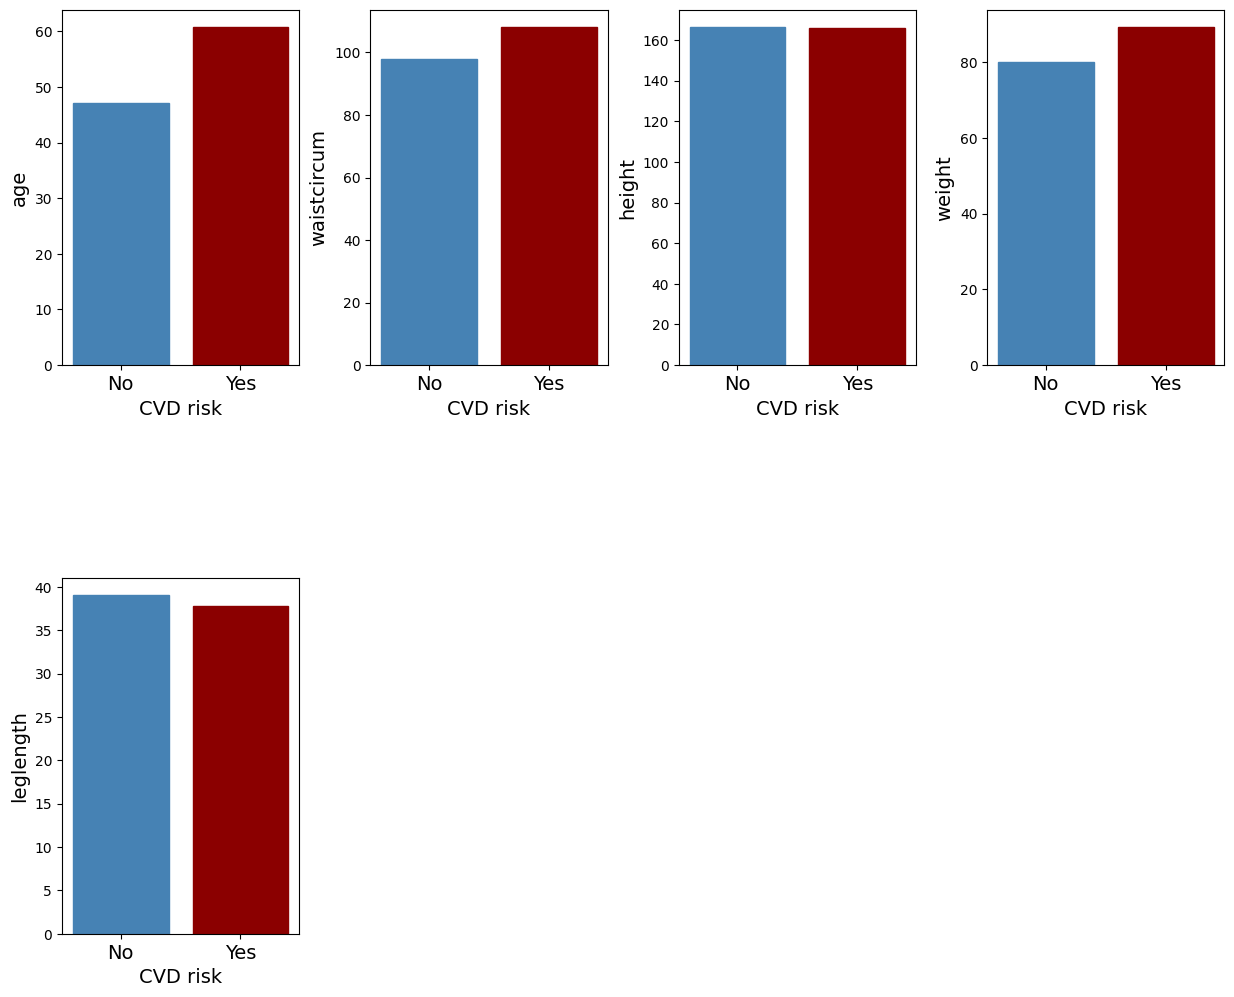

In [54]:
barplots(features, ncol=4, figsize=(15, 12))

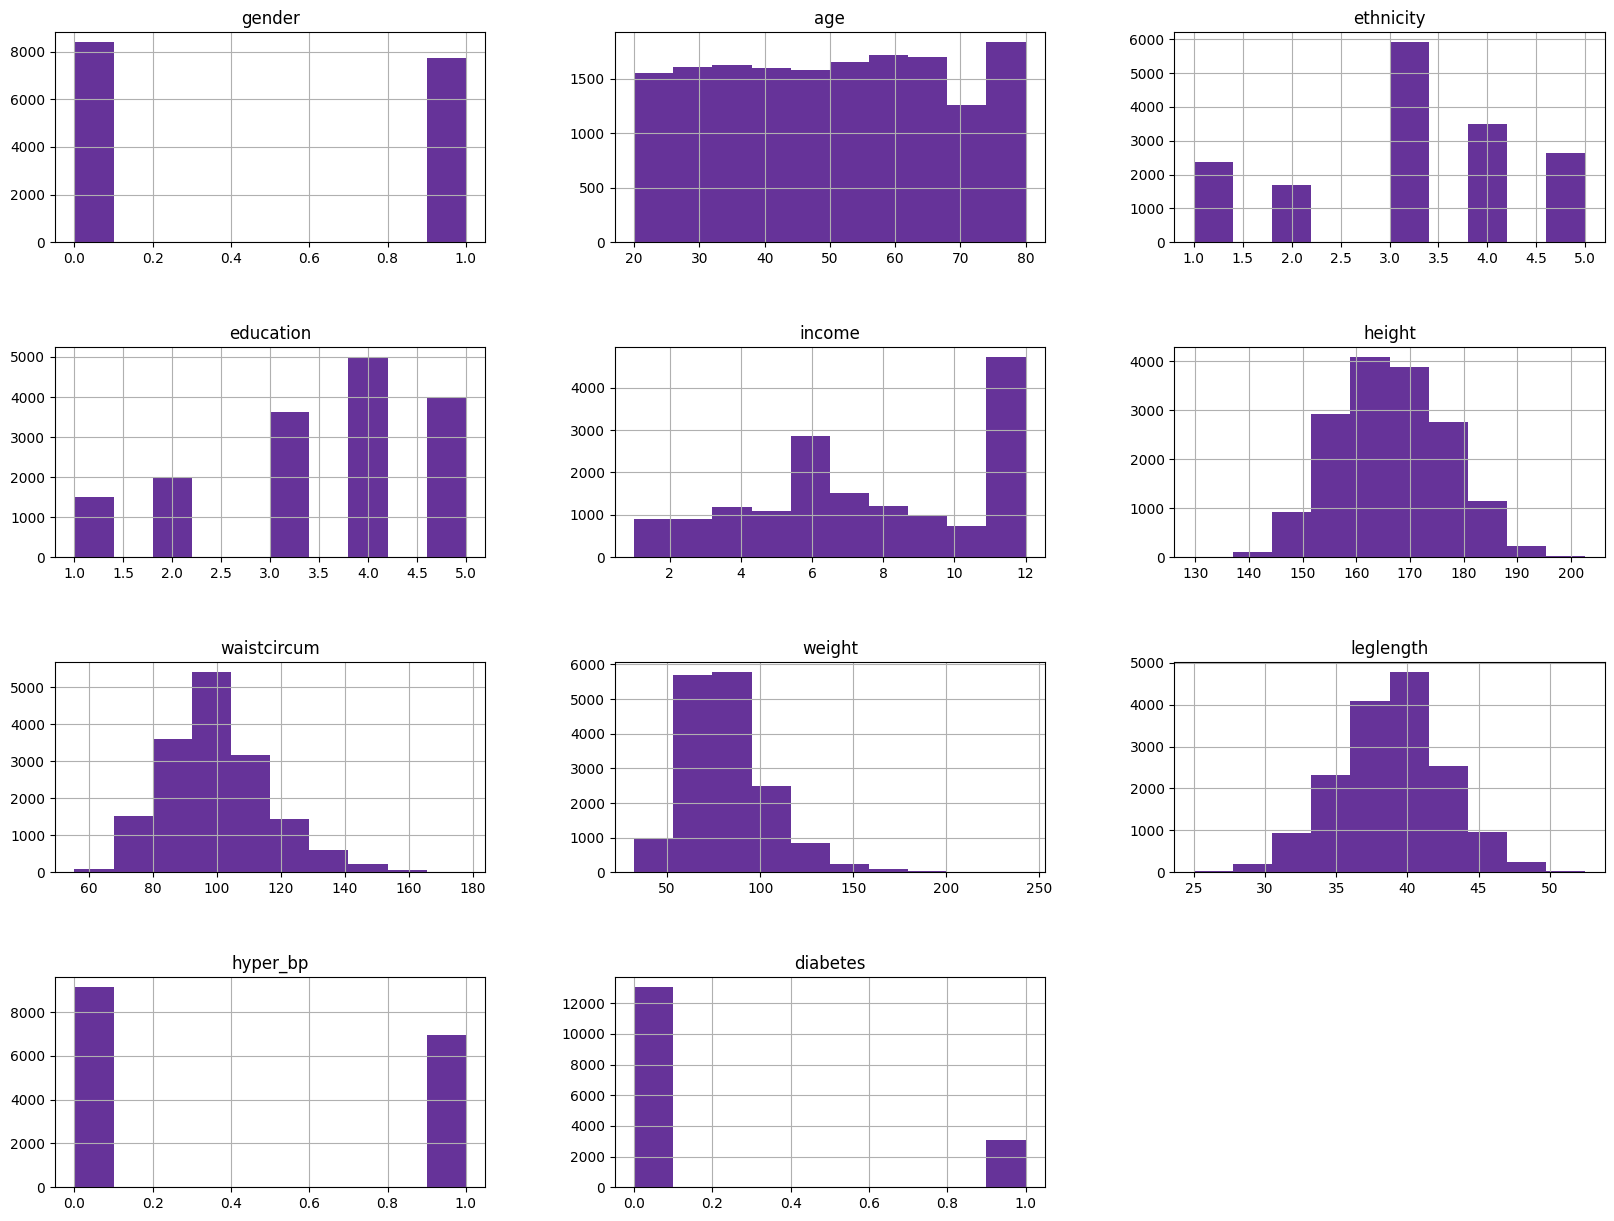

In [55]:
# histograms showing attribute distributions
dbtc_df.hist(figsize=(20, 15), color='rebeccapurple')
plt.subplots_adjust(hspace=0.5)
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.show()

In [56]:
corr_matrix = Xy_train.corr()


In [57]:
corr_matrix["diabetes"].sort_values(ascending=False)

diabetes       1.000000
age            0.304546
waistcircum    0.248614
weight         0.164624
hyper_bp       0.120535
gender         0.037153
ethnicity     -0.017059
height        -0.024884
income        -0.058673
education     -0.096830
leglength     -0.133865
Name: diabetes, dtype: float64

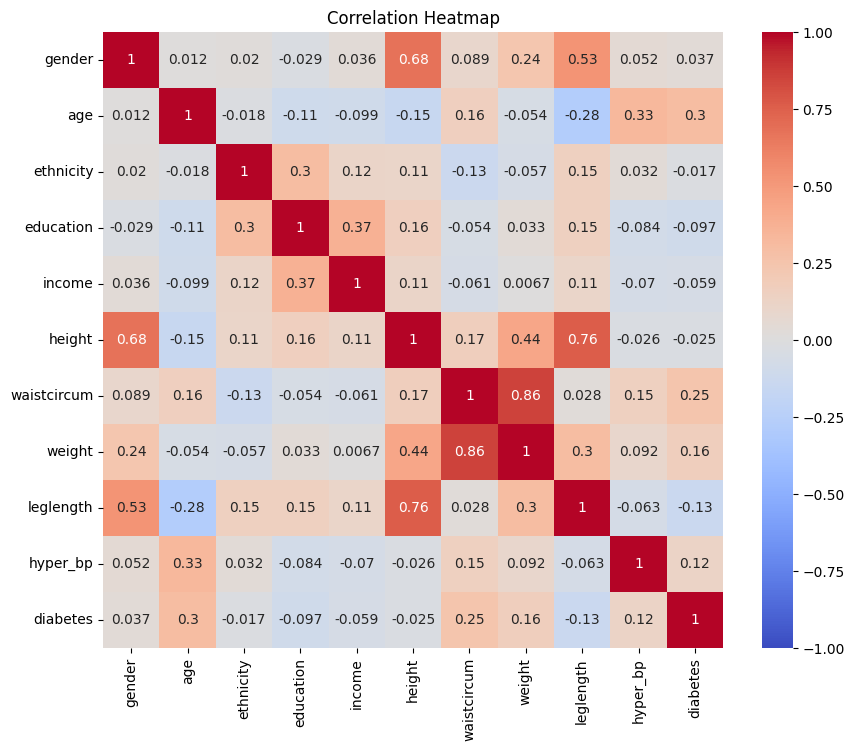

In [58]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

## Data Modeling

* **Training models**

In [59]:
dbtc_prepared.shape

(11592, 16)

In [60]:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(dbtc_prepared, y_train)

SGDClassifier(random_state=42)

* **Cross Validation**

In [61]:
cross_val_score(sgd_clf, dbtc_prepared, y_train, cv=6, scoring="accuracy")

array([0.81055901, 0.8110766 , 0.8110766 , 0.81055901, 0.8121118 ,
       0.81055901])

The scores above [0.6418258 , 0.63623661, 0.6432231 , 0.64089427, 0.64398882, 0.63793103]) show the accuracy of the model on each of the 6 folds (cv=6) in the cross-validation process. These scores can help see how the model performs across different subsets of the same data. It can give you an idea of the model's potential consistency.

**The accuracy is not looking good.** The model could have gotten a 79 percent accuracy by simply predicting "0" for each instance...

* **Confusion Matrix**

In [62]:
y_train_pred = cross_val_predict(sgd_clf, dbtc_prepared, y_train, cv=3)
con_matrix_00 = confusion_matrix(y_train, y_train_pred)
con_matrix_00

array([[9375,   25],
       [2161,   31]])

This is a confusion matrix showing True Negative, False positive, False Negative, and true positive. The top row are all the instances predicted as negative, the bottom row are all instances predicted to be positive. The first column are the actual negative instances, and the right column are the actual positive instances. These numbers are used to compute the precision, recall, and f1 scores below.





* **Precision, Recall, F1**

In [63]:
# because the confusion matrix wasn't in the order I expected it to be in, I did this out the long way too

confusion_matrix_train = con_matrix_00
TP = confusion_matrix_train[1][1]
FP = confusion_matrix_train[0][1]
FN = confusion_matrix_train[1][0]


precision = TP / (TP + FP)
recall = TP / (TP + FN)


f1 = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.5535714285714286
Recall: 0.014142335766423358
F1-Score: 0.027580071174377226


In [64]:
# binary classification
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Precision: 0.5535714285714286
Recall: 0.014142335766423358
F1-Score: 0.027580071174377226


Precision is: out of all the positive predictions, how many instances are actually positive.


Recall is: out of all the positive instances, how many of those instances are predicted to be positive.


The F1-score is a number representing the balance between precision and recall. If precision and recall are both 100% then F1 would be 1. If either precision or recall (or both) are zero, then f1 will be 0. The higher the f1, generally the better the model is, given the data.





* **Graphs**

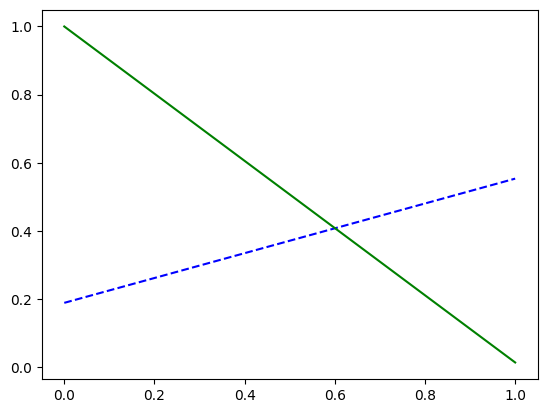

In [65]:
# precision and recall graphed against threshold
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_pred)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


This graph shows the precision scores and recall scores graphed against the thresholds. I don't understand why precision (the blue dashed line) never reaches 1 on the y axis... These lines are also not curved. This makes me think that I'm doing something wrong. It could also just be because the model is so terrible that this is what it looks like. I'm going to continue with parts b, c, etc and maybe come back and fix this later if I learn what happened.





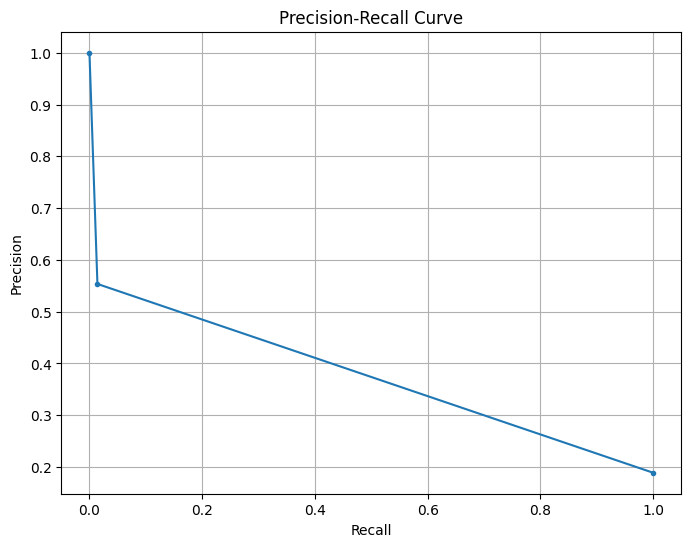

In [66]:
# precision agaisnt recall
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

This graph is also not very curve-like. But it shows how as precision goes down, recall goes up.

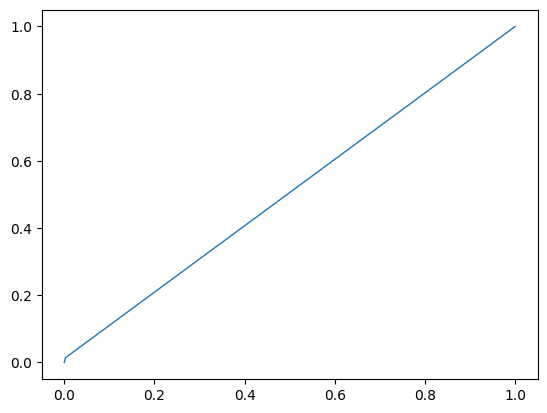

In [67]:
# ROC curve

fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=1, label=label)

plot_roc_curve(fpr, tpr)
plt.show()

This is the ROC graph. It also says that the model is terrible. A purely random would have a ROC curve that looks like a straight line going from 0,0 to 1,1. This "curve" is not far off from that.

* **ROC vs. PR**

Generally, the rule is that when the dataset is unbalanced, use the Precision-Recall graph, because the ROC curve can make your model seem better than it really is. The reason behind this is interesting.


The ROC curve is ratio-based, and the ratios used are the True Positive rate (proportion of true positive predictions relative to all positive instances) and the False Positive rate (the proportion of false positive predictions (when the instance is actually negative) and all actual negative instances). This setup is columnar, using the columns in the confusion matrix from above. Because each of the ratios are calculated only within the column, then the ROC curve is not going to change when the positive instances vs. negative instances balance in the data changes. ROC doesn't care about that. The ratios are comparing how positive instances are predicted and how negative instances are predicted. This means that the ROC curve is going to look better if the ratio of correctly predicted negative cases is higher. In the case of our data, around 79% of our data has a negative label, and while the model might be fairly good at predicting negative labels, we don't actually care about that. We're looking for correct positive labels; we want to know who is at risk for Diabetes.


The Precision-Recall graphs however DOES NOT take into account the "true negatives" at all.


So because our dataset is skewed, we use the PR curve. If our dataset was more balanced we could use ROC.





## Predictions

In [68]:
# preprocessing the test data with the pipeline
dbtc_prepared_test = the_full_pipeline.fit_transform(X_test)


In [69]:
# testing the model
the_predictions = sgd_clf.predict(dbtc_prepared_test)

In [70]:
# confusion matrix
confusion_matrix(y_test, the_predictions)

array([[2600,    0],
       [ 621,    0]])

In [71]:
precision_test = precision_score(y_test, the_predictions)
recall_test = recall_score(y_test, the_predictions)
f1_test = f1_score(y_test, the_predictions)

print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-Score:", f1_test)

Precision: 0.0
Recall: 0.0
F1-Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## EVALUATION (notebook d)

In [72]:
X_train.shape

(11592, 10)

In [73]:
# subset of training data for SVM gridsearch.
np.random.seed(13)
random_indices = np.random.choice(X_train.shape[0], 200, replace=False)
svm_grid_data_x = X_train.iloc[random_indices]
svm_grid_data_y = y_train.iloc[random_indices]


In [74]:
# preprocessing the data with the pipeline
the_training_data = the_full_pipeline.fit_transform(X_train)
the_validation_data = the_full_pipeline.fit_transform(X_val)
the_svm_grid_data_x = the_full_pipeline.fit_transform(svm_grid_data_x)

### SGDClassifier

In [75]:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(the_training_data, y_train)

SGDClassifier(random_state=42)

In [76]:
raw_scores = sgd_clf.decision_function(the_validation_data)
sgd_custom_pred = (raw_scores > (-.8)).astype(int)
# I played around with thresholds from (-8.5 - 0)...
# -.8 gave me trade off between precision and recall that I could accept.
# but does threshold even matter with ROC? I'll find out in a few hours I guess...


In [77]:
  sgc_prec = precision_score(y_val, sgd_custom_pred)
  sgc_rcll = recall_score(y_val, sgd_custom_pred)
  sgc_f1 = f1_score(y_val, sgd_custom_pred)

  print("precision: ", sgc_prec)
  print("recall: ", sgc_rcll)
  print("f1: ", sgc_f1)

precision:  0.4473684210526316
recall:  0.13438735177865613
f1:  0.20668693009118544


### Ridge Regression

In [78]:
# finding the best alpha hyperparameter

# alpha_values = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],}  # 100 was the best from this group, let's try more
# alpha_values = {'alpha': [90.0, 100.0, 110.0, 150.0, 200.0, 300.0, 1000.0],}  # 200 was the best out of this group
# alpha_values = {'alpha': [180.0, 190.0, 200.0, 210.0, 220.0, 230.0],}  # 180 from this group
# alpha_values = {'alpha': [155.0, 160.0, 165.0, 170.0, 175.0, 180.0, 185.0],}  # 185 from this group
alpha_values = {'alpha': [183.0, 184.0, 185.0, 186.0, 187.0, 188.0, 189.0, 190.0],}  # 185 from this group too!



In [79]:
grid_search = GridSearchCV(estimator=Ridge(random_state=42), param_grid=alpha_values, cv=4, scoring='neg_mean_squared_error')


In [80]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=4, estimator=Ridge(random_state=42),
             param_grid={'alpha': [183.0, 184.0, 185.0, 186.0, 187.0, 188.0,
                                   189.0, 190.0]},
             scoring='neg_mean_squared_error')

In [81]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_


In [82]:
# found the best alpha!

print(best_params)  # alpha is 185.0
print(best_estimator)


{'alpha': 185.0}
Ridge(alpha=185.0, random_state=42)


In [83]:
ridge_reg = Ridge(alpha=185, solver='auto', random_state=13)

In [84]:
# training the ridge regression model

ridge_reg.fit(the_training_data, y_train)


Ridge(alpha=185, random_state=13)

In [85]:
#getting the ridge regression predictions

ridreg_pred = ridge_reg.predict(the_validation_data)


In [86]:
# apply thresholding to the ridge regression predictions
# this converts the regression model's predictions into a classification

# threshold = .5  # precision:  0.619; recall:  0.051; f1:  0.094
# threshold = .7  # p: 0; r:0; f1:0
threshold = .3  # p: .43; r:.57; f1:.49
# threshold = .2  # p: .35; r:.86; f1:.50


ridreg_custom_pred = (ridreg_pred >= threshold).astype(int)


In [87]:
  ridreg_prec = precision_score(y_val, ridreg_custom_pred)
  ridreg_rcll = recall_score(y_val, ridreg_custom_pred)
  ridreg_f1 = f1_score(y_val, ridreg_custom_pred)

  print("precision: ", ridreg_prec)
  print("recall: ", ridreg_rcll)
  print("f1: ", ridreg_f1)

precision:  0.4319526627218935
recall:  0.5770750988142292
f1:  0.494077834179357


### SVM

In [88]:
# param_grid = {                              # best: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
#     'kernel': ['linear', 'rbf', 'poly'],
#     'C': [0.1, 1, 10],
#     'gamma': [0.01, 0.1, 1],
# }

# param_grid = {                              # best: {'C': 0.001, 'gamma': 0.009, 'kernel': 'linear'}
#     'kernel': ['linear', 'poly'],  # it said linear was better... but like.. I jsut have a hard time buying it, so I'm trying poly again
#     'C': [0.001, 0.008, 0.1, 0.2],
#     'gamma': [0.009, 0.01, 0.05],
# }

# param_grid = {                              # best: {'C': 1e-05, 'gamma': 0.0001, 'kernel': 'linear'}
#     'kernel': ['linear'],
#     'C': [0.00001, .0001, 0.001],
#     'gamma': [0.0001, 0.001, 0.009]
# }

# param_grid = {                                # best:  {'C': 1e-07, 'gamma': 1e-06, 'kernel': 'linear'}
#     'kernel': ['linear'],
#     'C': [0.0000001, 0.000001, 0.00001],
#     'gamma': [0.000001, 0.00001, 0.0001]
# }

# param_grid = {                                # best:  {'C': 1e-09, 'gamma': 1e-09, 'kernel': 'linear'}
#     'kernel': ['linear'],
#     'C': [1e-09, 1e-08, 1e-07],
#     'gamma': [1e-09, 1e-08, 1e-07, 1e-06]
# }

# param_grid = {                                 # best:  {'C': 1e-13, 'gamma': 1e-13, 'kernel': 'linear'}
#     'kernel': ['linear', 'poly'],
#     'C': [1e-13, 1e-12, 1e-11, 1e-10, 1e-09],
#     'gamma': [1e-13, 1e-12, 1e-11, 1e-10, 1e-09]
# }

# param_grid = {                                 # best:  {'C': 1e-19, 'gamma': 1e-19, 'kernel': 'linear'}
#     'kernel': ['linear', 'poly'],
#     'C': [1e-19, 1e-18, 1e-17, 1e-16, 1e-15, 1e-14, 1e-13],
#     'gamma': [1e-19, 1e-18, 1e-17, 1e-16, 1e-15, 1e-14, 1e-13]
# }

param_grid = {                                 # best:     {'C': 1e-25, 'gamma': 1e-25, 'kernel': 'linear'}
    'kernel': ['linear', 'poly'],
    'C': [1e-25, 1e-24, 1e-23, 1e-22, 1e-21, 1e-20, 1e-19],
    'gamma': [1e-25, 1e-24, 1e-23, 1e-22, 1e-21, 1e-20, 1e-19]
}

# i'm stopping here... this is just getting silly now. I think this means that an SVM might not be the best choice for this data

In [89]:
grid_search = GridSearchCV(estimator=SVC(random_state=13), param_grid=param_grid, cv=4, scoring='accuracy')


In [90]:
grid_search.fit(the_svm_grid_data_x, svm_grid_data_y)


GridSearchCV(cv=4, estimator=SVC(random_state=13),
             param_grid={'C': [1e-25, 1e-24, 1e-23, 1e-22, 1e-21, 1e-20, 1e-19],
                         'gamma': [1e-25, 1e-24, 1e-23, 1e-22, 1e-21, 1e-20,
                                   1e-19],
                         'kernel': ['linear', 'poly']},
             scoring='accuracy')

In [91]:
best_params = grid_search.best_params_
print(best_params)

{'C': 1e-25, 'gamma': 1e-25, 'kernel': 'linear'}


In [92]:
svm_clf = SVC(kernel='linear', C=1e-25, gamma=1e-25)


In [93]:
# svm_clf_000 = SVC(kernel='linear', C=.1, gamma=.1)
# svm_clf_000.fit(the_training_data, y_train)
# decision_values_000 = svm_clf_000.decision_function(the_validation_data)
# print(decision_values_000)


In [94]:
svm_clf.fit(the_training_data, y_train)


SVC(C=1e-25, gamma=1e-25, kernel='linear')

In [95]:
svm_pred = svm_clf.predict(the_validation_data)  # precision: 0, recall: 0, F1: 0... threshold time


In [96]:
decision_values = svm_clf.decision_function(the_validation_data)


In [97]:
# custom_threshold = 0.0  # zeros
# custom_threshold = -1   # p:.195, r: 1.0, f1: .32
# custom_threshold = -2  # p:.196, r: 1.0, f1: .32
# custom_threshold = -5  # same
# custom_threshold = -10  # same

print(decision_values) #..... it's all a bunch of negative ones.... -1. -1. -1....... I don't understand this

custom_threshold = -100  # same


[-1. -1. -1. ... -1. -1. -1.]


In [98]:
svm_custom_pred = (decision_values >= custom_threshold).astype(int)


In [99]:
  svm_prec = precision_score(y_val, svm_custom_pred)
  svm_rcll = recall_score(y_val, svm_custom_pred)
  svm_f1 = f1_score(y_val, svm_custom_pred)

  print("precision: ", svm_prec)
  print("recall: ", svm_rcll)
  print("f1: ", svm_f1)

precision:  0.19642857142857142
recall:  1.0
f1:  0.3283582089552239


### Decision Trees

In [100]:
# param_grid = {                                        # best: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}   <- 'auto' is depreciated
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2', None]
# }

param_grid = {                                        # best: {'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 8}
    'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
    'min_samples_split': [8, 10, 12, 14, 20],
    'min_samples_leaf': [3, 4, 5, 6, 8],
    'max_features': ['sqrt', 'log2', None]
}

In [101]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=13), param_grid=param_grid, cv=4, scoring='accuracy')


In [102]:
grid_search.fit(the_training_data, y_train)


KeyboardInterrupt: ignored

In [103]:
best_params = grid_search.best_params_
print(best_params)

AttributeError: ignored

In [104]:
dtree_clf = DecisionTreeClassifier(max_depth=2, max_features='sqrt', min_samples_leaf=3, min_samples_split=8, random_state=13)

In [105]:
dtree_clf.fit(the_training_data, y_train)


DecisionTreeClassifier(max_depth=2, max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=8, random_state=13)

In [106]:
dtree_pred = dtree_clf.predict(the_validation_data)


In [107]:
  dtree_prec = precision_score(y_val, dtree_pred)
  dtree_rcll = recall_score(y_val, dtree_pred)
  dtree_f1 = f1_score(y_val, dtree_pred)
  dtree_cm = confusion_matrix(y_val, dtree_pred)

  print(dtree_cm)
  print("precision: ", dtree_prec)  # 0.0
  print("recall: ", dtree_rcll)     # 0.0
  print("f1: ", dtree_f1)           # 0.0

[[1035    0]
 [ 253    0]]
precision:  0.0
recall:  0.0
f1:  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [108]:
dtree_cust_probabilities = dtree_clf.predict_proba(the_validation_data)


In [109]:
# custom_threshold = 0.5  # zeros
# custom_threshold = -0.5  # ha, recall at 1
# the values: print(dtree_cust_probabilities) -> [[0.83869717 0.16130283][0.68992248 0.31007752][0.83869717 0.16130283]
# custom_threshold = 0.3  # p==.29; r==.16; f1==.20
# custom_threshold = 0.35  # p==.36; r==.04; f1==.08
# custom_threshold = 0.25  # p==.29; r==.016; f1==.20
custom_threshold = 0.2  # p==.26; r==.044; f1==.33


In [110]:
dtree_predicted_classes = (dtree_cust_probabilities[:, 1] >= custom_threshold).astype(int)


In [ ]:
# print(dtree_cust_probabilities)

In [111]:
  dtree_prec = precision_score(y_val, dtree_predicted_classes)
  dtree_rcll = recall_score(y_val, dtree_predicted_classes)
  dtree_f1 = f1_score(y_val, dtree_predicted_classes)
  dtree_cm = confusion_matrix(y_val, dtree_predicted_classes)

  print(dtree_cm)
  print("precision: ", dtree_prec)
  print("recall: ", dtree_rcll)
  print("f1: ", dtree_f1)

[[731 304]
 [141 112]]
precision:  0.2692307692307692
recall:  0.4426877470355731
f1:  0.3348281016442451


### Random Forests

In [ ]:
# param_grid = {                                # best: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2']
# }

param_grid = {                                # best: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 90}
    'n_estimators': [80, 90, 100, 110, 120],
    'max_depth': [None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [2],
    'max_features': ['sqrt']
}

In [ ]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=13), param_grid=param_grid, cv=4, scoring='accuracy')


In [ ]:
# this was taking too long, so I'm going to use the subset of data from the SVM gridsearch

grid_search.fit(svm_grid_data_x, svm_grid_data_y)
best_params = grid_search.best_params_
print(best_params)

In [112]:
rforest_clf = RandomForestClassifier(n_estimators=90, max_depth=None, min_samples_split=2, min_samples_leaf=2, random_state=13)


In [113]:
rforest_clf.fit(the_training_data, y_train)


RandomForestClassifier(min_samples_leaf=2, n_estimators=90, random_state=13)

In [114]:
rforest_pred = rforest_clf.predict(the_validation_data)


In [115]:
  rforest_prec = precision_score(y_val, rforest_pred)
  rforest_rcll = recall_score(y_val, rforest_pred)
  rforest_f1 = f1_score(y_val, rforest_pred)
  rforest_cm = confusion_matrix(y_val, rforest_pred)

  print(rforest_cm)
  print("precision: ", rforest_prec)
  print("recall: ", rforest_rcll)
  print("f1: ", rforest_f1)

[[1002   33]
 [ 210   43]]
precision:  0.5657894736842105
recall:  0.16996047430830039
f1:  0.2613981762917933


### One ROC graph to rule them all

In [116]:

fpr1, tpr1, _ = roc_curve(y_val, sgd_custom_pred)
fpr2, tpr2, _ = roc_curve(y_val, ridreg_custom_pred)
fpr3, tpr3, _ = roc_curve(y_val, svm_custom_pred)
fpr4, tpr4, _ = roc_curve(y_val, dtree_predicted_classes)
fpr5, tpr5, _ = roc_curve(y_val, rforest_pred)


roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)
roc_auc4 = auc(fpr4, tpr4)
roc_auc5 = auc(fpr5, tpr5)


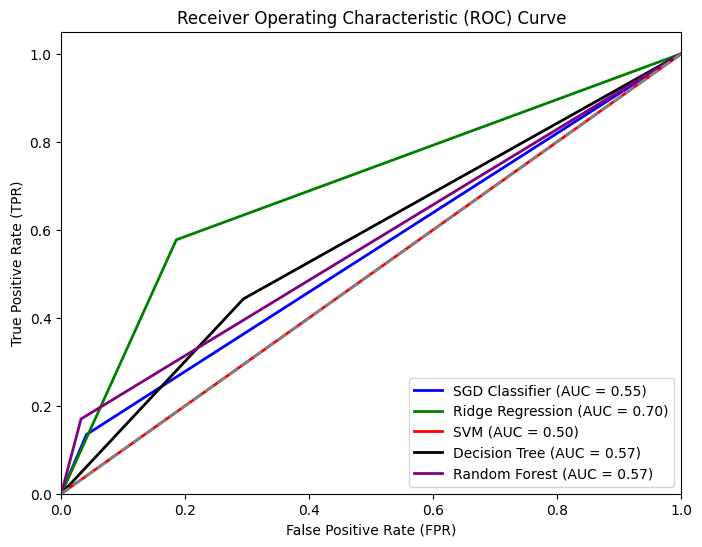

In [117]:
plt.figure(figsize=(8, 6))

plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'SGD Classifier (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='green', lw=2, label=f'Ridge Regression (AUC = {roc_auc2:.2f})')
plt.plot(fpr3, tpr3, color='red', lw=2, label=f'SVM (AUC = {roc_auc3:.2f})')
plt.plot(fpr4, tpr4, color='black', lw=2, label=f'Decision Tree (AUC = {roc_auc4:.2f})')
plt.plot(fpr5, tpr5, color='purple', lw=2, label=f'Random Forest (AUC = {roc_auc5:.2f})')


plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line for reference

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Grad Students / extra credit (notebook d)

### a) Most Influential Attributes

In [118]:
# calling .coef_ on my trained models

sgd_feat_coefs = sgd_clf.coef_
ridreg_feat_coefs = ridge_reg.coef_
svm_feat_coefs = svm_clf.coef_
dtree_feat_importance = dtree_clf.feature_importances_
rforest_feat_importance = rforest_clf.feature_importances_

coefs_list = [('SGD_clf', sgd_feat_coefs), ('ridge_reg', ridreg_feat_coefs), ('svm_clf', svm_feat_coefs), ('dtree_clf', dtree_feat_importance), ('rforest_clf', rforest_feat_importance)]


In [194]:
# print(svm_feat_coefs)

In [195]:
# print(ridreg_feat_coefs)

In [196]:
# dbtc_prepared_df.columns

In [119]:

def get_top_3_features(coefs, X_train_df):
  columns = X_train_df.columns

  list_of_tuples = []

  if len(coefs) == 1:
    coefs = coefs[0]

  for i in range(len(columns)):
    tup00 = (columns[i], abs(coefs[i]))
    list_of_tuples.append(tup00)

  # sort
  sorted_tupe_list = sorted(list_of_tuples, key=lambda x: x[1], reverse=True)

  return sorted_tupe_list[:3]


In [120]:
# dbtc_prepared_df

for tup in coefs_list:
  print('***********************************')
  print('***********************************')
  print(f"MODEL: {tup[0]}")
  print('***')
  top_three = get_top_3_features(tup[1], dbtc_prepared_df)
  print(top_three[0])
  print(top_three[1])
  print(top_three[2])





***********************************
***********************************
MODEL: SGD_clf
***
('hypertension', 0.6502556207568523)
('Male', 0.6151066682835128)
('Female', 0.5623832395734917)
***********************************
***********************************
MODEL: ridge_reg
***
('age', 0.10077204137503384)
('leglength', 0.058306090318611184)
('waistcircum', 0.055321805518634054)
***********************************
***********************************
MODEL: svm_clf
***
('age', 1.6714160465947174e-22)
('waistcircum', 1.406472728853661e-22)
('weight', 9.626416254103512e-23)
***********************************
***********************************
MODEL: dtree_clf
***
('leglength', 0.4957572331961517)
('weight', 0.3633553601147419)
('income', 0.14088740668910632)
***********************************
***********************************
MODEL: rforest_clf
***
('age', 0.20302945076093581)
('waistcircum', 0.16805301324959243)
('weight', 0.15304529322089966)


**EXPLINATION:** (provide an explanation of the results including why some algorithms did better than others:)

This is a tough one. Let me run through each model one by one. Honestly, there are more than a few results from this assignment that confuse me.


**the models**


Let's start off with the most confusing for me. The SVM model. When I was using gridsearch to find the "best" C and gamma values, the gridsearch was continually returning the lowest values being tested. This means that the boundary between the support vectors (encompassing probably all of the support vectors?) is going to be as wide as possible. I thought at first that this must mean that the data is not the best match of a SVM, but I don't think that anymore. Really I'm just confused. The decision values for the SVM with teeny tiny hyperparameters were all "-1.". I just ran a new SVM with the hyperparameters set to be larger (.1 and .1) I got decision values that were different from '-1.'. Maybe the grid search wasn't the best match for the SVM? Maybe I did something wrong with my gridsearch that I can't currently find?


Another result that confused me was how the Ridge Regression model did better than all the more "traditional" classification models. This gets me questioning what the difference between a classification model and a regression model really is. If you can get "decision values” from a classification model, and you can use thresholding with a regression model... then why are some models supposedly "better" at one than the other?? Seeing how well the ridge regression model did on the data was what convinced me that the data probably is linearly separable. Having such a terrible time with the SVM model (in both this assignment AND the SVM lab) was making me think that maybe these data sets are just not that easily separable. But Ridge Regression handled it pretty well, comparatively. So the problem has to do with how I'm approaching the SVMachines. Maybe I'll try working with one on the final project so I can really try to get better at it?


SGD, Decision Tree, and Random Forest all did equally bad on the dataset. Aside from 'weight' showing up in 2 of the models' top-three attributes list, all other top-three attributes are different for each model. This makes me think that the main problem with all these models isn't the models themselves, but the data. Each model is finding “something/anything” to base its predictions off of, but nothing is jumping out as definitive.


**the data**
The problem I see with the data is that everybody already either has, or doesn't have, diabetes. This means that the majority of "1"s in the target column are already diagnosed and under a doctor's care. That doctor is probably encouraging them to watch their weight, their cholesterol, their bp... and depending on how long these people have had diabetes for, they might well have many of the "tells" in the data under control. So the data point, the person, labeled '1' for diabetes might have already lost a bunch of weight, be on hypertension meds, be eating healthy… and now what does my model actually have to look for? Data that WOULD be useful would be data that followed people over the course of their lives. Then we could see which individuals GET diabetes and when.


**improving the data I have** If I had more time I would go get the data related to which medications people are on. If they're taking hypertension meds, I would mark that as hypertension. Maybe I would find questions in the questionnaire about exercise history and weight loss/gain history. But I don't know if that actually exists in this data set.



### b) Ensemble Modeling

####**attempt 1: voting**

 I never got this one running... too many odd roadblocks. SGD doesn't work with soft voting, so I can't change the thresholds if I use that one. I tried running this model with ONLY random forest and decision tree (which seems silly now that I understand that the random forest is an ensemble model of decision trees anyways), but then when I went to change the threshold I got an error saying that probabilities still weren't supported. I think it has to do with my random forest hyperparameters, but at this point I'm not going back to see if I can change it around. Don't get me wrong; I WANT to, but I have other work to do for this class and Prof Mansouri's class, AND I'm going to get things in order to apply to a few internships (due next week). Right now, the syntax all fits together and the model "runs" and "makes predictions" but it guessed 0 for every instance... which is why I wanted to change the thresholds around in the first place. It'll have to do. I bet that if I started this whole project with the goal of making and using an ensemble model that I would have made a few choices differently... Maybe





In [134]:
# in this ensemble model I'm leaving out SVM because it's performance is terrible
# I'm also leaving out ridge regression because it's a regression model and I don't see how it'll easily fit in here

ensemble_voting_clf = VotingClassifier(
    estimators=[
        ('sgd', sgd_clf),
        ('svm', svm_clf),
        ('random_forest', rforest_clf),
        ('decision_tree', dtree_clf),
    ],
    voting='hard'
)

ensemble_voting_clf.fit(the_training_data, y_train)



VotingClassifier(estimators=[('sgd', SGDClassifier(random_state=42)),
                             ('svm',
                              SVC(C=1e-25, gamma=1e-25, kernel='linear')),
                             ('random_forest',
                              RandomForestClassifier(min_samples_leaf=2,
                                                     n_estimators=90,
                                                     random_state=13)),
                             ('decision_tree',
                              DecisionTreeClassifier(max_depth=2,
                                                     max_features='sqrt',
                                                     min_samples_leaf=3,
                                                     min_samples_split=8,
                                                     random_state=13))])

In [135]:
ens_y_pred = ensemble_voting_clf.predict(the_validation_data)
# y_pred_prob = ensemble_voting_clf.predict_proba(the_validation_data)

# custom_threshold = 0.7

# y_pred_adjusted = (y_pred_prob[:, 1] > custom_threshold).astype(int)

In [136]:
ens_prec = precision_score(y_val, ens_y_pred)
ens_rcll = recall_score(y_val, ens_y_pred)
ens_f1 = f1_score(y_val, ens_y_pred)
ens_cm = confusion_matrix(y_val, ens_y_pred)

print(ens_cm)
print("precision: ", ens_prec)
print("recall: ", ens_rcll)
print("f1: ", ens_f1)

[[1035    0]
 [ 253    0]]
precision:  0.0
recall:  0.0
f1:  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### **attempt 2: Gradient Boosting**

This approach seemed like a great idea, but I'm getting this odd error (all errors are odd if you don't understand why they're happening, ha!) saying that the model was expecting 4 features but got 16 instead. I see that the df it was trained on has 4 sets of predictions... but since it accepted the y_val as an argument in .fit() I assumed that that was how I use .predict() too...


---


I think I'm just doing something more fundamentally wrong here.. All the documentation and explanations I can find regarding the XGBClassifier() don't train it the way I'm trying to train it here...





In [137]:
ensemble_data_df = pd.DataFrame({
    "SGD_Predictions": sgd_custom_pred,
    "RandomForest_Predictions": rforest_pred,
    "Ridge_Predictions": ridreg_custom_pred,
    "dtree_predictions": dtree_pred
})

ensemble_boost_model = XGBClassifier()
ensemble_boost_model.fit(ensemble_data_df, y_val)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [138]:
the_test_data = the_full_pipeline.fit_transform(X_test)


In [139]:
boost_data_predictions = ensemble_boost_model.predict(the_test_data)


ValueError: ignored